# Preliminary Exploratory Data Analysis
Using a mockup of the restaurant data set 

In [1]:
from path import Path
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# Add Matplotlib inline magic command
%matplotlib inline

import plotly.express as px


In [2]:
data = Path('Resources/tripadvisor_european_restaurants.csv')
restaurant_df = pd.read_csv(data)
restaurant_df.head()

C:\Users\genei\AppData\Local\Temp\ipykernel_21576\1565404655.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  restaurant_df = pd.read_csv(data)


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [3]:
print(restaurant_df.shape)

(1083397, 42)


In [4]:
restaurant_df.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords'],
      dtype='object')

In [5]:
# Determine data types
restaurant_df.dtypes

restaurant_link                       object
restaurant_name                       object
original_location                     object
country                               object
region                                object
province                              object
city                                  object
address                               object
latitude                             float64
longitude                            float64
claimed                               object
awards                                object
popularity_detailed                   object
popularity_generic                    object
top_tags                              object
price_level                           object
price_range                           object
meals                                 object
cuisines                              object
special_diets                         object
features                              object
vegetarian_friendly                   object
vegan_opti

In [6]:
# Count the NaN under each column
restaurant_df.isnull().sum()

restaurant_link                           0
restaurant_name                           0
original_location                         0
country                                   0
region                                50323
province                             340632
city                                 400685
address                                   0
latitude                              15790
longitude                             15790
claimed                                1842
awards                               820264
popularity_detailed                   94988
popularity_generic                    97792
top_tags                             110634
price_level                          277205
price_range                          779070
meals                                448050
cuisines                             169103
special_diets                        743141
features                             765990
vegetarian_friendly                       0
vegan_options                   

<AxesSubplot:>

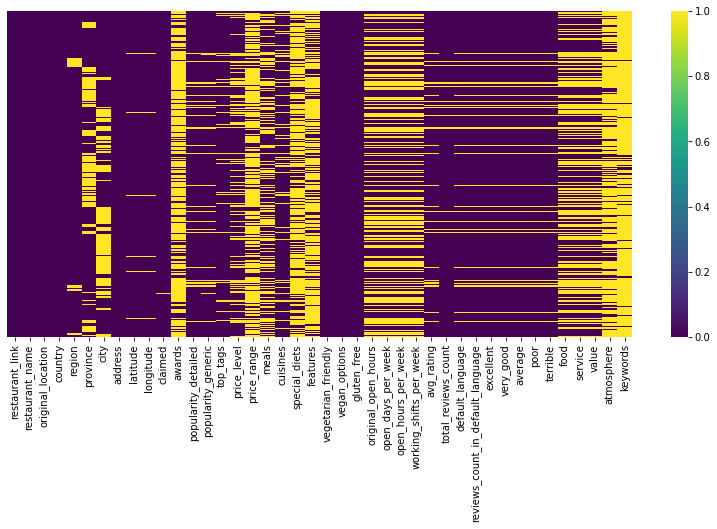

In [7]:
# Use heatmap to visulize the distribution of null data
import seaborn as sns
plt.figure(figsize = (14,6))
sns.heatmap(restaurant_df.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='vegetarian_friendly', ylabel='count'>

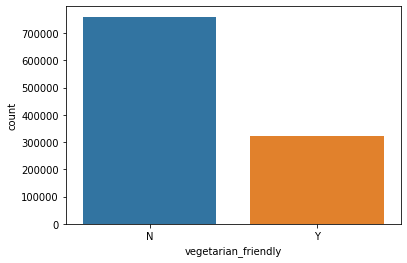

In [8]:
sns.countplot(x='vegetarian_friendly',data=restaurant_df)

<AxesSubplot:xlabel='service', ylabel='count'>

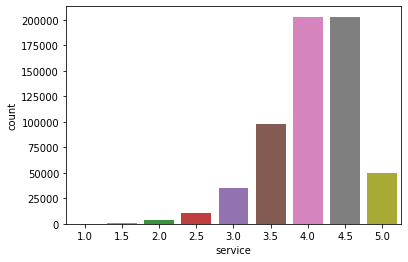

In [9]:
sns.countplot(x='service', data=restaurant_df)

<AxesSubplot:xlabel='gluten_free', ylabel='count'>

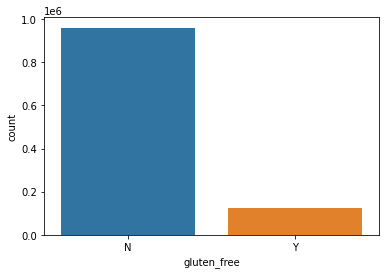

In [10]:
sns.countplot(x='gluten_free',data=restaurant_df)

In [11]:
# Drop unnecessary columns
modify_resta = restaurant_df.drop(columns=['restaurant_link','original_location', 'claimed', 'keywords', 'province', 
                              'atmosphere', 'price_range', 'popularity_detailed', 
                              'popularity_generic', 'top_tags', 'meals','special_diets', 'features', 
                              'vegan_options','gluten_free', 'original_open_hours', 'open_days_per_week',
                              'open_hours_per_week', 'working_shifts_per_week', 
                              'reviews_count_in_default_language', 'excellent', 'very_good',
                             'average', 'poor', 'terrible', 'food', 'value', 'atmosphere',
                             'keywords', 'default_language', ])

In [12]:
print(modify_resta.shape)

(1083397, 14)


In [13]:
modify_resta.head()

,restaurant_name,country,region,city,address,latitude,longitude,awards,price_level,cuisines,vegetarian_friendly,avg_rating,total_reviews_count,service
0,Le 147,France,Nouvelle-Aquitaine,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,NaN,€,French,N,4.0,36.0,4.5
1,Le Saint Jouvent,France,Nouvelle-Aquitaine,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,NaN,€,NaN,N,4.0,5.0,NaN
2,Au Bout du Pont,France,Centre-Val de Loire,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,NaN,€,"French, European",N,5.0,13.0,NaN
3,Le Relais de Naiade,France,Nouvelle-Aquitaine,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,NaN,€,French,N,4.0,34.0,4.5
4,Relais Du MontSeigne,France,Occitanie,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,NaN,€€-€€€,French,N,4.5,11.0,4.5


In [14]:
# Look at country value counts to select countries based on one location
country_counts = modify_resta.country.value_counts()
country_counts

Italy               224763
Spain               157479
France              155288
England             144681
Germany             115333
Greece               33763
Portugal             32592
The Netherlands      29792
Poland               24698
Belgium              23711
Austria              20487
Sweden               18555
Czech Republic       14844
Scotland             14215
Ireland              11203
Denmark               9485
Wales                 9134
Croatia               8375
Romania               7842
Hungary               7431
Finland               7372
Bulgaria              4469
Slovakia              4251
Northern Ireland      3634
Name: country, dtype: int64

In [15]:
# Filter the dataset to only include The british Island countries
britain_df = modify_resta.loc[(modify_resta['country'] == "England")| 
                                    (modify_resta['country'] == "Ireland")|
                                   (modify_resta['country'] == "Scotland")|
                                    (modify_resta['country'] == "Wales")]
print(britain_df.shape)

(179233, 14)


In [16]:
britain_df.head(5)

,restaurant_name,country,region,city,address,latitude,longitude,awards,price_level,cuisines,vegetarian_friendly,avg_rating,total_reviews_count,service
478379,Cafe Mylor,England,Cornwall,Mylor Churchtown,"Penarrow Road Mylor Yacht Harbour, Mylor Churc...",50.177025,-5.053397,"Travellers' Choice, Certificate of Excellence ...",€€-€€€,"Cafe, British",Y,4.5,347.0,4.5
478380,Subway,England,Surrey,Byfleet,"39 Old Woking Road, Byfleet KT14 6LG England",51.337010,-0.504781,NaN,€,Deli,N,3.5,4.0,NaN
478381,The Bakery,England,Surrey,Byfleet,"Coldharbour Road, Byfleet GU22 8SW England",51.327370,-0.510920,NaN,NaN,International,N,5.0,6.0,NaN
478382,Basmati tandoori,England,Surrey,Byfleet,"23 High Road, Byfleet KT14 7QH England",51.339140,-0.478110,NaN,€€-€€€,"Indian, Asian, Bangladeshi",N,3.0,4.0,NaN
478383,China Chef,England,Surrey,Byfleet,"72 High Road Byfleet, Byfleet KT14 7QL England",51.338920,-0.476430,NaN,€€-€€€,Chinese,N,2.5,10.0,NaN


In [17]:
# Look at country cuisines to determine if cuisines could be filitered or needs to be dropped
cuisine_counts = britain_df.cuisines.value_counts()
cuisine_counts

Bar, British, Pub                       13370
Cafe                                    12038
Cafe, British                           11093
British                                  8015
Fast food                                5182
                                        ...  
Cafe, Asian, Vietnamese, Soups              1
Balti, Pakistani, Indian                    1
Cafe, British, Italian, Pizza, Asian        1
Mediterranean, Pizza, Cafe, British         1
Irish, European, Soups, Cafe                1
Name: cuisines, Length: 15491, dtype: int64

In [18]:
britain_df.isna().sum()

restaurant_name             0
country                     0
region                    708
city                    30040
address                     0
latitude                 1618
longitude                1618
awards                 124083
price_level             41185
cuisines                25393
vegetarian_friendly         0
avg_rating              14003
total_reviews_count      8338
service                 67364
dtype: int64

<AxesSubplot:>

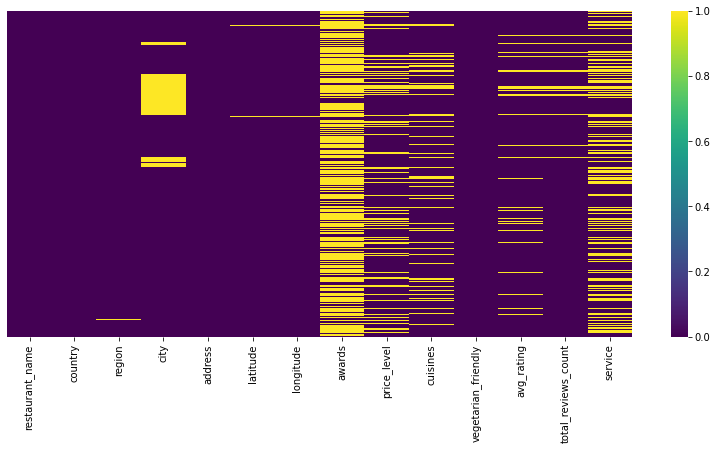

In [19]:
# Use heatmap to visulize the distribution of null data
plt.figure(figsize = (14,6))
sns.heatmap(britain_df.isnull(), yticklabels=False, cmap='viridis')

In [20]:
# Check how many characters need to be corrected
unique_price_level = britain_df['price_level'].unique()
unique_price_level

array(['€€-€€€', '€', nan, '€€€€'], dtype=object)

In [21]:
# Look at country cuisines to determine if cuisines could be filitered or needs to be dropped
price_counts = britain_df.price_level.value_counts()
price_counts

€€-€€€    89791
€         45605
€€€€       2652
Name: price_level, dtype: int64

In [22]:
# Apply the map function to turn euro symbol to number
britain_df['price_level'] = britain_df['price_level'].map({'€':1,'€€-€€€':2, '€€€€':3 })

C:\Users\genei\AppData\Local\Temp\ipykernel_21576\107256644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  britain_df['price_level'] = britain_df['price_level'].map({'€':1,'€€-€€€':2, '€€€€':3 })


In [23]:
britain_df.head()

,restaurant_name,country,region,city,address,latitude,longitude,awards,price_level,cuisines,vegetarian_friendly,avg_rating,total_reviews_count,service
478379,Cafe Mylor,England,Cornwall,Mylor Churchtown,"Penarrow Road Mylor Yacht Harbour, Mylor Churc...",50.177025,-5.053397,"Travellers' Choice, Certificate of Excellence ...",2.0,"Cafe, British",Y,4.5,347.0,4.5
478380,Subway,England,Surrey,Byfleet,"39 Old Woking Road, Byfleet KT14 6LG England",51.337010,-0.504781,NaN,1.0,Deli,N,3.5,4.0,NaN
478381,The Bakery,England,Surrey,Byfleet,"Coldharbour Road, Byfleet GU22 8SW England",51.327370,-0.510920,NaN,NaN,International,N,5.0,6.0,NaN
478382,Basmati tandoori,England,Surrey,Byfleet,"23 High Road, Byfleet KT14 7QH England",51.339140,-0.478110,NaN,2.0,"Indian, Asian, Bangladeshi",N,3.0,4.0,NaN
478383,China Chef,England,Surrey,Byfleet,"72 High Road Byfleet, Byfleet KT14 7QL England",51.338920,-0.476430,NaN,2.0,Chinese,N,2.5,10.0,NaN


In [24]:
price_counts2 = britain_df.price_level.value_counts()
price_counts2

2.0    89791
1.0    45605
3.0     2652
Name: price_level, dtype: int64

In [26]:
clean_britian_df = britain_df.dropna( how='any', subset=['price_level', 'service'])
clean_britian_df.shape

(110304, 14)

In [27]:
clean_britian_df = clean_britian_df.drop(columns=['restaurant_name', 
                                                  'country', 
                                                  'region', 
                                                  'city', 
                                                  'address', 
                                                  'latitude', 'longitude', 
                                                  'cuisines'])
clean_britian_df.head()

,awards,price_level,vegetarian_friendly,avg_rating,total_reviews_count,service
478379,"Travellers' Choice, Certificate of Excellence ...",2.0,Y,4.5,347.0,4.5
478384,NaN,2.0,N,3.5,32.0,3.5
478386,NaN,2.0,Y,4.0,101.0,4.5
478389,"Travellers' Choice, Certificate of Excellence ...",2.0,Y,4.5,104.0,4.5
478392,NaN,2.0,Y,3.5,34.0,3.0


In [28]:
clean_award_df = clean_britian_df.copy()
clean_award_df[['awards']] = clean_award_df[['awards']].notnull().astype(int)
clean_award_df

,awards,price_level,vegetarian_friendly,avg_rating,total_reviews_count,service
478379,1,2.0,Y,4.5,347.0,4.5
478384,0,2.0,N,3.5,32.0,3.5
478386,0,2.0,Y,4.0,101.0,4.5
478389,1,2.0,Y,4.5,104.0,4.5
478392,0,2.0,Y,3.5,34.0,3.0
...,...,...,...,...,...,...
886002,1,2.0,Y,5.0,158.0,5.0
886003,0,2.0,N,4.5,24.0,4.5
886004,1,2.0,Y,4.5,104.0,4.5
886007,1,2.0,Y,4.5,106.0,4.5


In [29]:
# Export the clean data 
# clean_award_df.to_csv("Resources/clean_britian_restaurants.csv")